### DATA PREPARATION

Importing necssary libraries

In [27]:
import pandas as pd
import numpy as np

import df_helper as dfh

df_helper = dfh.df_helper()

Loading the data

In [28]:

admissions = pd.read_csv('data/admissions.csv')
omr = pd.read_csv('data/omr.csv')
diagnoses = pd.read_csv('data/diagnoses_icd.csv')
patients=pd.read_csv("data/patients.csv")
diagnoses2=pd.read_csv("data/d_icd_diagnoses.csv")
prescriptions=pd.read_csv("data/prescriptions.csv")

The first step was to view the data.

In [29]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


In [30]:
omr.head()

,subject_id,chartdate,seq_num,result_name,result_value
0,10011398,2146-12-01,1,Height (Inches),63
1,10011398,2147-01-22,1,Weight (Lbs),127
2,10011398,2146-12-01,1,Weight (Lbs),135
3,10011398,2147-07-24,1,Weight (Lbs),136
4,10011398,2147-03-26,1,Weight (Lbs),136


In [31]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09


In [32]:
prescriptions.head()

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10027602,28166872,27168639,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10027602,28166872,40720238,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10027602,28166872,62845687,NaN,NaN,NaN,2201-10-31 12:00:00,NaN,MAIN,Lorazepam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10027602,28166872,24340150,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10027602,28166872,14435820,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9


In [34]:
diagnoses2.head()

,icd_code,icd_version,long_title
0,0090,9,"Infectious colitis, enteritis, and gastroenter..."
1,01160,9,"Tuberculous pneumonia [any form], unspecified"
2,01186,9,"Other specified pulmonary tuberculosis, tuberc..."
3,01200,9,"Tuberculous pleurisy, unspecified"
4,01236,9,"Tuberculous laryngitis, tubercle bacilli not f..."


In [35]:
# Function to split blood pressure and convert to numeric
def preprocess_blood_pressure(bp_str):
    if pd.isna(bp_str) or not isinstance(bp_str, str):
        return pd.Series([None, None])
    try:
        systolic, diastolic = map(int, bp_str.split('/'))
        return pd.Series([systolic, diastolic])
    except:
        return pd.Series([None, None])

In [36]:
pivot_omr = omr.pivot_table(
    index=['subject_id'], 
    columns='result_name', 
    values='result_value', aggfunc="last"
).reset_index()

df_helper.drop_columns(pivot_omr,[
    "Blood Pressure Lying", 
    "Blood Pressure Sitting", 
    "Blood Pressure Standing (1 min)", 
    "Blood Pressure Standing (3 mins)"
])

df_helper.rename_columns(pivot_omr, {
    "BMI (kg/m2)":"bmi",
    "Blood Pressure":"blood pressure",
    "Height (Inches)":"height",
    "Weight (Lbs)":"weight"
})

pivot_omr = df_helper.convert_inches_to_meters(pivot_omr, "height", 2)
pivot_omr = df_helper.convert_lbs_to_kg(pivot_omr, "weight", 2)

# Apply the function and expand into separate columns
pivot_omr[['bp_systolic', 'bp_diastolic']] = pivot_omr['blood pressure'].apply(preprocess_blood_pressure)
df_helper.drop_columns(
    pivot_omr,[
        "blood pressure",
    ]
)

pivot_omr

result_name,subject_id,bmi,height,weight,bp_systolic,bp_diastolic
0,10000032,19.2,1.52,44.60,121.0,77.0
1,10001217,24.3,1.68,68.17,134.0,84.0
2,10001725,32.6,1.63,80.20,142.0,72.0
3,10002428,21.5,1.52,40.82,190.0,105.0
4,10002495,25.8,1.68,72.57,159.0,59.0
...,...,...,...,...,...,...
74,10038992,31.9,1.78,101.00,140.0,85.0
75,10038999,33.4,1.73,99.79,NaN,NaN
76,10039708,39.1,1.59,77.30,140.0,66.0
77,10039997,33.4,1.65,81.60,150.0,84.0


In [37]:
#defining t a function to define the base of all dataframes
base_df = pd.merge(admissions, pivot_omr, how="left", on="subject_id")
df_helper.drop_columns(
    base_df,[
        "admit_provider_id",
        "discharge_location",
        "hospital_expire_flag",
        "edregtime",
        "edouttime",
])
filtered_df=df_helper.column_subset(
    patients,[
        "subject_id",
        "gender",
        "anchor_age"
])
base_df=pd.merge(filtered_df, base_df, on="subject_id", how="right")
#rename anchor_age to age
df_helper.rename_column(base_df, "anchor_age", "age")
base_df

,subject_id,gender,age,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic
0,10004235,M,47,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0
1,10009628,M,58,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,NaN,108.0,70.0
2,10018081,M,79,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicare,ENGLISH,MARRIED,WHITE,28.5,1.73,85.00,140.0,60.0
3,10006053,M,52,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,NaN,NaN,NaN
4,10031404,F,82,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10038992,M,70,24745425,2187-07-29 01:05:00,2187-08-03 17:02:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,MARRIED,WHITE,31.9,1.78,101.00,140.0,85.0
271,10008287,F,43,22168393,2145-09-28 01:17:00,2145-10-02 13:35:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,75.34,96.0,60.0
272,10022880,M,66,27708593,2177-03-12 07:15:00,2177-03-19 14:25:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,MARRIED,WHITE,29.3,1.85,95.25,142.0,84.0
273,10004457,M,65,23251352,2141-12-17 11:00:00,2141-12-21 15:56:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,SINGLE,OTHER,24.4,1.77,76.11,162.0,89.0


In [38]:
merged_diagnoses= pd.merge(diagnoses, diagnoses2, on=['icd_code', 'icd_version'], how='left')
merged_diagnoses.drop(["icd_code", "icd_version","seq_num"],axis=1,inplace=True)
#rename long_title column to diagnosis
merged_diagnoses.rename(columns={"long_title":"diagnosis"}, inplace=True)
#merge diagnoseswith the pivot_omr dataframe using the subject_id column
merged_diagnoses = pd.merge(merged_diagnoses, base_df, on="subject_id", how="right")
merged_diagnoses.drop("hadm_id_y", axis=1, inplace=True)
#rename hadm_id_x to hadm_id
merged_diagnoses.rename(columns={"hadm_id_x":"hadm_id"}, inplace=True)
merged_diagnoses


,subject_id,hadm_id,diagnosis,gender,age,admittime,dischtime,deathtime,admission_type,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic
0,10004235,25970245,Acute and chronic cholecystitis,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0
1,10004235,25970245,"Body Mass Index 35.0-35.9, adult",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0
2,10004235,25970245,Other specified cardiac dysrhythmias,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0
3,10004235,25970245,"Obesity, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0
4,10004235,25970245,"Gout, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31228,10004457,23251352,Personal history of malignant neoplasm of pros...,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0
31229,10004457,23251352,Multiple involvement of mitral and aortic valves,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0
31230,10004457,23251352,"Asthma, unspecified type, unspecified",M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0
31231,10004457,23251352,Chronic total occlusion of coronary artery,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,NaN,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0


In [39]:
death_df=admissions[["subject_id","hadm_id","deathtime"]].copy()
death_df["died"]=death_df["deathtime"].isna()==False
death_df.drop("deathtime",axis=1,inplace=True)
death_df.head()

,subject_id,hadm_id,died
0,10004235,24181354,False
1,10009628,25926192,False
2,10018081,23983182,False
3,10006053,22942076,True
4,10031404,21606243,False


In [40]:
#Merge the death df with the merged diagnoses dataframe

diagnoses_death_df=pd.merge(merged_diagnoses, death_df, on=["subject_id","hadm_id"], how="left")
diagnoses_death_df["died"].fillna(False, inplace=True)
diagnoses_death_df.drop("deathtime",axis=1, inplace=True)
diagnoses_death_df

,subject_id,hadm_id,diagnosis,gender,age,admittime,dischtime,admission_type,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died
0,10004235,25970245,Acute and chronic cholecystitis,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
1,10004235,25970245,"Body Mass Index 35.0-35.9, adult",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
2,10004235,25970245,Other specified cardiac dysrhythmias,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
3,10004235,25970245,"Obesity, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
4,10004235,25970245,"Gout, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31228,10004457,23251352,Personal history of malignant neoplasm of pros...,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False
31229,10004457,23251352,Multiple involvement of mitral and aortic valves,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False
31230,10004457,23251352,"Asthma, unspecified type, unspecified",M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False
31231,10004457,23251352,Chronic total occlusion of coronary artery,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False


In [41]:
# merging the filtered_df dataframe with the diagnoses_death_df dataframe using the subject_id column as the key. 
filtered_df=patients[["subject_id","anchor_age"]]
diagnoses_death_df=pd.merge(filtered_df, diagnoses_death_df, on="subject_id", how="right")
#rename anchor_age to age

diagnoses_death_df.rename(columns={"anchor_age":"age"}, inplace=True)
diagnoses_death_df

,subject_id,age,hadm_id,diagnosis,gender,age,admittime,dischtime,admission_type,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died
0,10004235,47,25970245,Acute and chronic cholecystitis,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
1,10004235,47,25970245,"Body Mass Index 35.0-35.9, adult",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
2,10004235,47,25970245,Other specified cardiac dysrhythmias,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
3,10004235,47,25970245,"Obesity, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
4,10004235,47,25970245,"Gout, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31228,10004457,65,23251352,Personal history of malignant neoplasm of pros...,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False
31229,10004457,65,23251352,Multiple involvement of mitral and aortic valves,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False
31230,10004457,65,23251352,"Asthma, unspecified type, unspecified",M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False
31231,10004457,65,23251352,Chronic total occlusion of coronary artery,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,Medicare,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False


In [42]:

length_of_stay_df =diagnoses_death_df.copy()

length_of_stay_df["admittime"]=pd.to_datetime(length_of_stay_df["admittime"])
length_of_stay_df["dischtime"]=pd.to_datetime(length_of_stay_df["dischtime"])

#calculate the length of stay in days

length_of_stay_df["length_of_stay"]=length_of_stay_df["dischtime"]-length_of_stay_df["admittime"]
length_of_stay_df["length_of_stay"]=length_of_stay_df["length_of_stay"].dt.days

length_of_stay_df



,subject_id,age,hadm_id,diagnosis,gender,age,admittime,dischtime,admission_type,admission_location,...,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died,length_of_stay
0,10004235,47,25970245,Acute and chronic cholecystitis,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,...,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False,8
1,10004235,47,25970245,"Body Mass Index 35.0-35.9, adult",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,...,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False,8
2,10004235,47,25970245,Other specified cardiac dysrhythmias,M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,...,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False,8
3,10004235,47,25970245,"Obesity, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,...,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False,8
4,10004235,47,25970245,"Gout, unspecified",M,47,2196-02-24 14:38:00,2196-03-04 14:02:00,URGENT,TRANSFER FROM HOSPITAL,...,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,34.9,1.83,116.57,138.0,101.0,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31228,10004457,65,23251352,Personal history of malignant neoplasm of pros...,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,...,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False,2
31229,10004457,65,23251352,Multiple involvement of mitral and aortic valves,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,...,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False,2
31230,10004457,65,23251352,"Asthma, unspecified type, unspecified",M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,...,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False,2
31231,10004457,65,23251352,Chronic total occlusion of coronary artery,M,65,2147-12-19 00:00:00,2147-12-21 16:10:00,SURGICAL SAME DAY ADMISSION,PHYSICIAN REFERRAL,...,ENGLISH,DIVORCED,WHITE,24.4,1.77,76.11,162.0,89.0,False,2


In [43]:
#merging specific features from the prescriptions csv
prescriptions_df=length_of_stay_df.copy()
filtered_readmission_df =prescriptions[["subject_id","hadm_id","drug_type","drug"]]
prescriptions_df=pd.merge(filtered_readmission_df, prescriptions_df, on=["subject_id","hadm_id"],how="left")
#prescriptions.drop("gender_y", axis=1, inplace=True)
#rename gender_x to gender
prescriptions_df.rename(columns={"gender_x":"gender"}, inplace=True)
#dropping duplicates from the readmission_df
prescriptions_df.drop_duplicates(inplace=True)
prescriptions_df


,subject_id,hadm_id,drug_type,drug,age,diagnosis,gender,age,admittime,dischtime,...,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died,length_of_stay
0,10027602,28166872,MAIN,Fentanyl Citrate,71,"Urinary tract infection, site not specified",F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
1,10027602,28166872,MAIN,Fentanyl Citrate,71,Acute respiratory failure,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
2,10027602,28166872,MAIN,Fentanyl Citrate,71,"Asthma, unspecified type, unspecified",F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
3,10027602,28166872,MAIN,Fentanyl Citrate,71,Solitary pulmonary nodule,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
4,10027602,28166872,MAIN,Fentanyl Citrate,71,Streptococcus infection in conditions classifi...,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362332,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,"Constipation, unspecified",M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362333,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,"Hematuria, unspecified",M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362334,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,Obstructive sleep apnea (adult) (pediatric),M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362335,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,Long term (current) use of anticoagulants,M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3


In [44]:
#Useful for TimeSeries
df=admissions.copy()
df.admittime = pd.to_datetime(df.admittime)   
df.dischtime = pd.to_datetime(df.dischtime)

df1 = df.groupby([df.admittime.dt.year, df.admittime.dt.month]).count().rename_axis(['year', 'month'])['admittime'].reset_index(name='Entries')

df1

,year,month,Entries
0,2110,4,1
1,2110,11,1
2,2111,1,1
3,2111,11,1
4,2112,9,1
...,...,...,...
217,2201,2,1
218,2201,3,1
219,2201,7,1
220,2201,10,1


In [45]:
admissions.duplicated().value_counts()

False    275
Name: count, dtype: int64

In [46]:
#Calculating the number of readmissions for each subject_id using a readmission threshold of 30 days
readmissions_df= admissions[["subject_id","hadm_id","admittime","dischtime"]].copy()


readmissions_df['admittime'] = pd.to_datetime(readmissions_df['admittime'])
readmissions_df['dischtime'] = pd.to_datetime(readmissions_df['dischtime'])

# Assuming df is your dataframe and readmission_threshold is defined
readmission_threshold = pd.Timedelta(days=30)

# Sort by subject_id, admittime
readmissions_df = readmissions_df.sort_values(by=['subject_id', 'admittime'])

# Calculate the time to next admission and determine if it's a readmission
readmissions_df['next_admittime'] = readmissions_df.groupby('subject_id')['admittime'].shift(-1)
readmissions_df['readmission_time'] = readmissions_df['next_admittime'] - readmissions_df['dischtime']
readmissions_df['is_readmission'] = (readmissions_df['readmission_time'] <= readmission_threshold) & (readmissions_df['readmission_time'] > pd.Timedelta(days=0))

# Calculate readmissions per patient
readmissions_df['readmissions'] = readmissions_df.groupby('subject_id')['is_readmission'].cumsum()

#merge readmission_df with base_df
base_copy = base_df.copy()
base_copy.drop(["admittime", "dischtime"], axis=1, inplace=True)
readmissions_df = pd.merge(readmissions_df, base_copy, on=['subject_id', 'hadm_id'], how='left')
readmissions_df

,subject_id,hadm_id,admittime,dischtime,next_admittime,readmission_time,is_readmission,readmissions,gender,age,...,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,2180-06-26 18:27:00,50 days 01:12:00,False,0,F,52,...,TRANSFER FROM HOSPITAL,Other,ENGLISH,WIDOWED,WHITE,19.2,1.52,44.60,121.0,77.0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,2180-07-23 12:35:00,25 days 17:46:00,True,1,F,52,...,EMERGENCY ROOM,Medicaid,ENGLISH,WIDOWED,WHITE,19.2,1.52,44.60,121.0,77.0
2,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,2180-08-05 23:44:00,11 days 05:49:00,True,2,F,52,...,EMERGENCY ROOM,Medicaid,ENGLISH,WIDOWED,WHITE,19.2,1.52,44.60,121.0,77.0
3,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaT,NaT,False,2,F,52,...,EMERGENCY ROOM,Medicaid,ENGLISH,WIDOWED,WHITE,19.2,1.52,44.60,121.0,77.0
4,10001217,24597018,2157-11-18 22:56:00,2157-11-25 18:00:00,2157-12-18 16:58:00,22 days 22:58:00,True,1,F,55,...,EMERGENCY ROOM,Other,?,MARRIED,WHITE,24.3,1.68,68.17,134.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10040025,22251969,2147-08-03 02:58:00,2147-08-06 16:50:00,2147-11-09 08:02:00,94 days 15:12:00,False,1,F,64,...,EMERGENCY ROOM,Other,ENGLISH,DIVORCED,WHITE,38.1,1.68,107.20,112.0,60.0
271,10040025,27876215,2147-11-09 08:02:00,2147-11-14 18:53:00,2147-12-04 20:48:00,20 days 01:55:00,True,2,F,64,...,EMERGENCY ROOM,Other,ENGLISH,DIVORCED,WHITE,38.1,1.68,107.20,112.0,60.0
272,10040025,27259207,2147-12-04 20:48:00,2147-12-18 16:43:00,2147-12-29 19:36:00,11 days 02:53:00,True,3,F,64,...,EMERGENCY ROOM,Other,ENGLISH,DIVORCED,WHITE,38.1,1.68,107.20,112.0,60.0
273,10040025,25933959,2147-12-29 19:36:00,2148-01-09 17:38:00,2148-01-23 12:18:00,13 days 18:40:00,True,4,F,64,...,PHYSICIAN REFERRAL,Other,ENGLISH,DIVORCED,WHITE,38.1,1.68,107.20,112.0,60.0


### Data Cleaning

In [47]:
#Checking for duplicates and missing values from the prescriptions df

prescriptions_df.duplicated().sum()


0

In [48]:
#missing values
prescriptions_df.isnull().sum()

subject_id                0
hadm_id                   0
drug_type                 0
drug                      0
age                       0
diagnosis                 0
gender                    0
age                       0
admittime                 0
dischtime                 0
admission_type            0
admission_location        0
insurance                 0
language                  0
marital_status         6971
race                      0
bmi                   30835
height                38545
weight                23612
bp_systolic           46636
bp_diastolic          46636
died                      0
length_of_stay            0
dtype: int64

In [49]:
#drop missing values from the dataset

prescriptions_df.dropna(inplace=True)
prescriptions_df

,subject_id,hadm_id,drug_type,drug,age,diagnosis,gender,age,admittime,dischtime,...,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died,length_of_stay
0,10027602,28166872,MAIN,Fentanyl Citrate,71,"Urinary tract infection, site not specified",F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
1,10027602,28166872,MAIN,Fentanyl Citrate,71,Acute respiratory failure,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
2,10027602,28166872,MAIN,Fentanyl Citrate,71,"Asthma, unspecified type, unspecified",F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
3,10027602,28166872,MAIN,Fentanyl Citrate,71,Solitary pulmonary nodule,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
4,10027602,28166872,MAIN,Fentanyl Citrate,71,Streptococcus infection in conditions classifi...,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362332,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,"Constipation, unspecified",M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362333,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,"Hematuria, unspecified",M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362334,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,Obstructive sleep apnea (adult) (pediatric),M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362335,10014354,26228185,MAIN,Carbamide Peroxide 6.5%,60,Long term (current) use of anticoagulants,M,60,2148-06-24 15:22:00,2148-06-28 13:54:00,...,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3


In [50]:
prescriptions_df.isnull().sum()

subject_id            0
hadm_id               0
drug_type             0
drug                  0
age                   0
diagnosis             0
gender                0
age                   0
admittime             0
dischtime             0
admission_type        0
admission_location    0
insurance             0
language              0
marital_status        0
race                  0
bmi                   0
height                0
weight                0
bp_systolic           0
bp_diastolic          0
died                  0
length_of_stay        0
dtype: int64

In [51]:
cleaned_data= prescriptions_df.copy()
cleaned_data.head()

,subject_id,hadm_id,drug_type,drug,age,diagnosis,gender,age,admittime,dischtime,...,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died,length_of_stay
0,10027602,28166872,MAIN,Fentanyl Citrate,71,"Urinary tract infection, site not specified",F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
1,10027602,28166872,MAIN,Fentanyl Citrate,71,Acute respiratory failure,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
2,10027602,28166872,MAIN,Fentanyl Citrate,71,"Asthma, unspecified type, unspecified",F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
3,10027602,28166872,MAIN,Fentanyl Citrate,71,Solitary pulmonary nodule,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
4,10027602,28166872,MAIN,Fentanyl Citrate,71,Streptococcus infection in conditions classifi...,F,71,2201-10-30 12:05:00,2201-11-20 14:45:00,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21


Dropping duplicate age column

In [52]:
cleaned_data = cleaned_data.loc[:, ~cleaned_data.columns.duplicated(keep='first')]
cleaned_data.columns

Index(['subject_id', 'hadm_id', 'drug_type', 'drug', 'age', 'diagnosis',
       'gender', 'admittime', 'dischtime', 'admission_type',
       'admission_location', 'insurance', 'language', 'marital_status', 'race',
       'bmi', 'height', 'weight', 'bp_systolic', 'bp_diastolic', 'died',
       'length_of_stay'],
      dtype='object')

## Exploratory Data Analysis


In [53]:
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns      # For enhanced statistical plots


In [54]:
cleaned_data.head()

,subject_id,hadm_id,drug_type,drug,age,diagnosis,gender,admittime,dischtime,admission_type,...,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died,length_of_stay
0,10027602,28166872,MAIN,Fentanyl Citrate,71,"Urinary tract infection, site not specified",F,2201-10-30 12:05:00,2201-11-20 14:45:00,EW EMER.,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
1,10027602,28166872,MAIN,Fentanyl Citrate,71,Acute respiratory failure,F,2201-10-30 12:05:00,2201-11-20 14:45:00,EW EMER.,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
2,10027602,28166872,MAIN,Fentanyl Citrate,71,"Asthma, unspecified type, unspecified",F,2201-10-30 12:05:00,2201-11-20 14:45:00,EW EMER.,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
3,10027602,28166872,MAIN,Fentanyl Citrate,71,Solitary pulmonary nodule,F,2201-10-30 12:05:00,2201-11-20 14:45:00,EW EMER.,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
4,10027602,28166872,MAIN,Fentanyl Citrate,71,Streptococcus infection in conditions classifi...,F,2201-10-30 12:05:00,2201-11-20 14:45:00,EW EMER.,...,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21


### a) Univariate Analysis
Univariate analysis involves examining the distribution and characteristics of individual variables(numerical features). We'll go through this step by step.




In [55]:
# Function for univariate analysis
def univariate_analysis(df, column_name):
    # Summary statistics
    summary = cleaned_data[column_name].describe()
    print(f"Summary statistics for {column_name}:\n{summary}\n")

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(cleaned_data[column_name], bins=10, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot to detect outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cleaned_data[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

#### 1. Distribution of Age

Summary statistics for age:
count    1.025833e+06
mean     6.136875e+01
std      1.022936e+01
min      2.100000e+01
25%      5.600000e+01
50%      6.000000e+01
75%      6.400000e+01
max      9.100000e+01
Name: age, dtype: float64



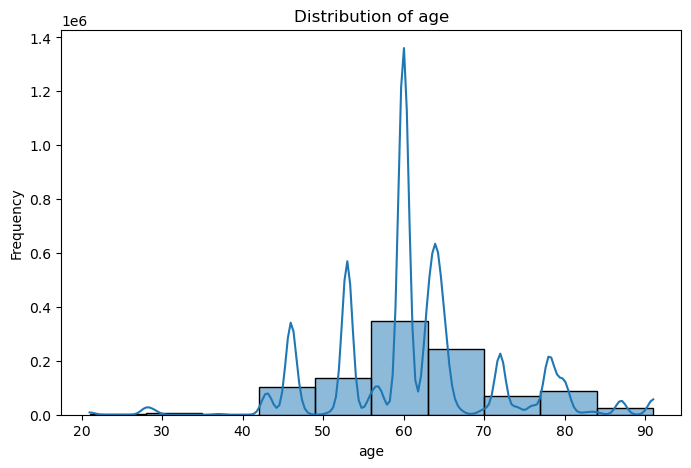

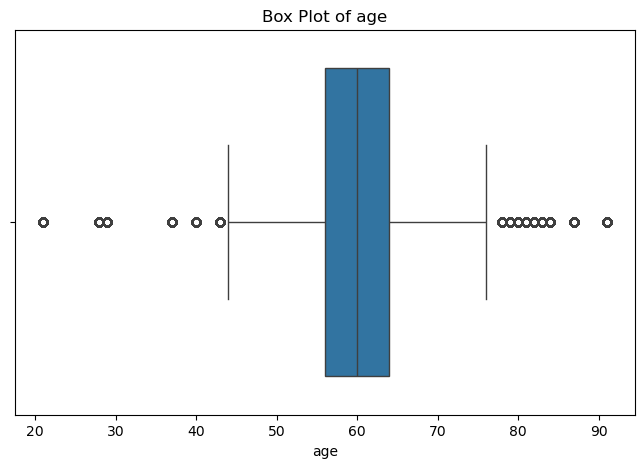

In [56]:
univariate_analysis(cleaned_data, 'age')

* The age distribution is skewed left, indicating a higher proportion of older individuals with a mean age of 62.62 years and a standard deviation of 13.93 years. The data reveals a concentration of individuals between 53 and 72 years, with a peak around the 60-65 year age group, suggesting a predominantly older population.
* The box plot reveals a clear left-skewed distribution of age, characterized by a longer whisker towards the younger end of the age spectrum, indicating a larger proportion of older individuals within the dataset and a median age situated approximately at the 65-year mark.

#### 2. length_of_stay

Summary statistics for length_of_stay:
count    1.025833e+06
mean     6.281938e+00
std      7.195579e+00
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      9.000000e+00
max      4.400000e+01
Name: length_of_stay, dtype: float64



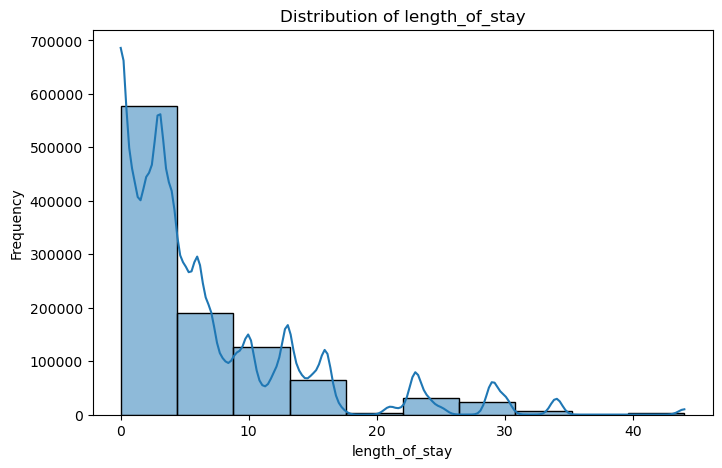

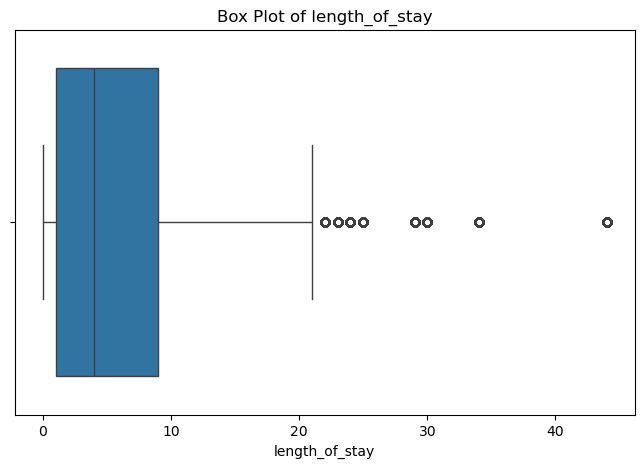

In [57]:
univariate_analysis(cleaned_data, 'length_of_stay')

* The distribution of length of stay is right-skewed, with a mean of 8.24 days and a median likely between 6-7 days (as indicated by the 50th percentile). This suggests that most patients have shorter stays, but there is a significant proportion of patients with longer stays, pulling the mean to the right. The distribution is characterized by a long tail, indicating the presence of outliers with exceptionally long lengths of stay.
* For the box plot,The presence of numerous outliers, representing patients with significantly longer stays, contributes to the elongated right tail of the distribution. This suggests that a small subset of patients account for a disproportionate amount of the overall length of stay.

### b) Bivariate Analysis

Used to investigate the relationship between two variables.

Lets start with a contingency table that shows the frequency distribution of variables

#### 1. Admission type vs Died


In [58]:
# Crosstab for Admission Type vs Died
contingency_table = pd.crosstab(cleaned_data['admission_type'], cleaned_data['died'])
print(contingency_table)


died                          False  True 
admission_type                            
AMBULATORY OBSERVATION        19153   3960
DIRECT EMER.                  52679  16893
DIRECT OBSERVATION            20731      0
ELECTIVE                      35998   7920
EU OBSERVATION               150520      0
EW EMER.                     305345  19227
OBSERVATION ADMIT            265887  14168
SURGICAL SAME DAY ADMISSION   19102   1053
URGENT                        83346   9851


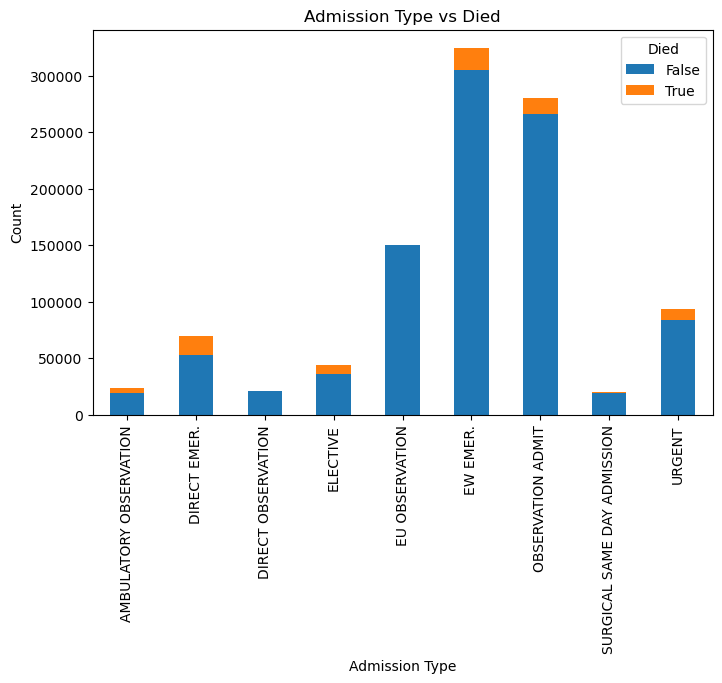

In [59]:
# Stacked bar plot for Admission Type vs Died
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Admission Type vs Died')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.legend(title='Died')
plt.show()


 The chart shows that admission types like EW EMER. and OBSERVATION ADMIT have higher overall patient counts, with a noticeable proportion of deaths. In contrast, admission types like AMBULATORY OBSERVATION and DIRECT OBSERVATION have lower overall counts and fewer associated deaths. This suggests potential correlations between admission type and mortality rates, with certain admission types possibly indicating higher risks.

In [60]:
#creating a function for Bivariate analysis
def bivariate_categorical_countplot(df, cat_var1, cat_var2):
    """
    Perform bivariate analysis for two categorical features using a count plot.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    cat_var1 (str): The first categorical variable.
    cat_var2 (str): The second categorical variable.
    """
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cleaned_data, x=cat_var1, hue=cat_var2, palette='Set1')
    plt.title(f'{cat_var1} vs. {cat_var2}')
    plt.xlabel(cat_var1)
    plt.ylabel('Count')
    plt.legend(title=cat_var2)
    plt.show()


#### 2. Gender vs Died

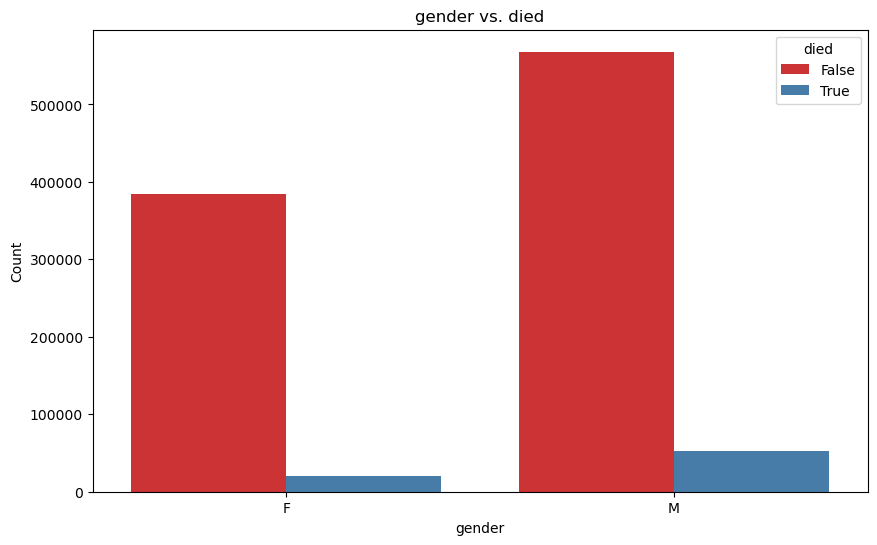

In [61]:

bivariate_categorical_countplot(cleaned_data, 'gender', 'died')

The bar chart illustrates a higher mortality rate among male patients compared to female patients.

#### 3. Marital vs Died

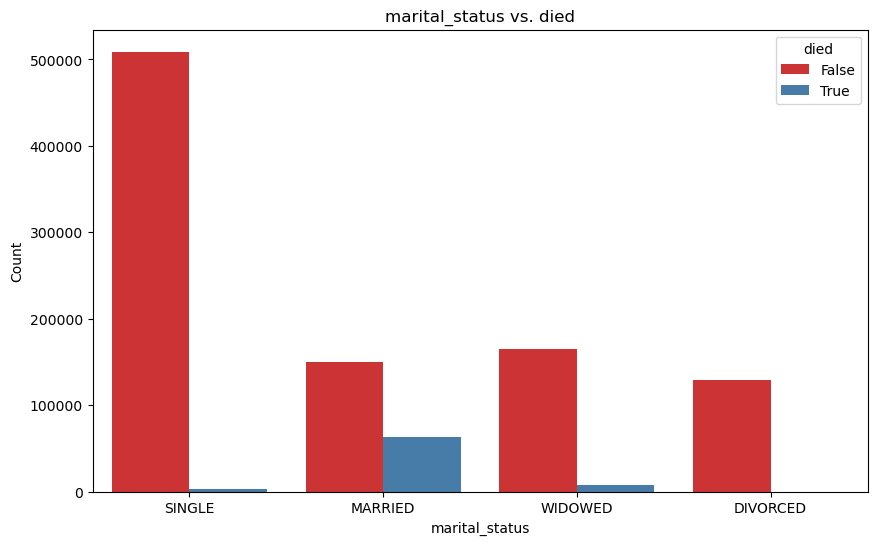

In [62]:
bivariate_categorical_countplot(cleaned_data, 'marital_status', 'died')

The bar chart illustrates that married individuals have the highest count, followed by widowed, divorced, and single individuals, with a disproportionately higher number of deaths among single individuals relative to their population size.

#### 4. Age vs Length of stay

In [63]:
cleaned_data.age

0          71
1          71
2          71
3          71
4          71
           ..
2362332    60
2362333    60
2362334    60
2362335    60
2362336    60
Name: age, Length: 1025833, dtype: int64

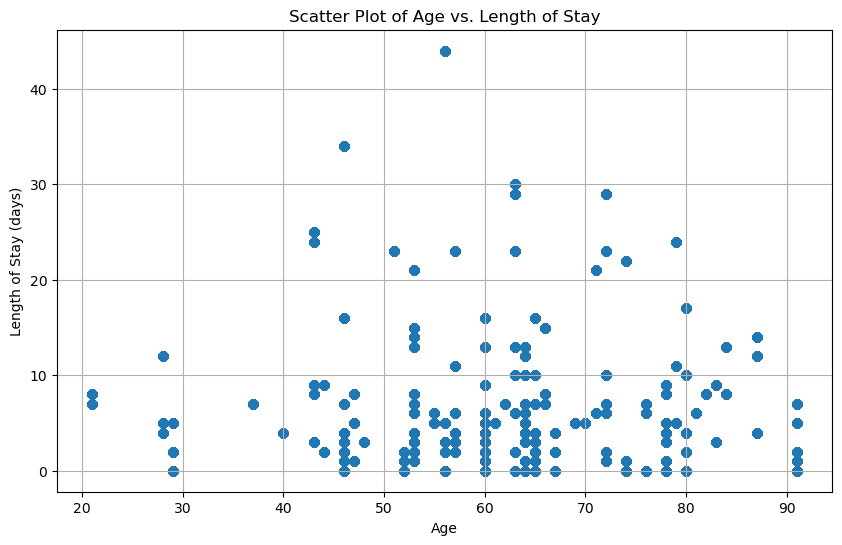

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['age'], cleaned_data['length_of_stay'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Length of Stay')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.grid(True)
plt.show()


The scatter plot indicates a weak or no correlation between age and length of stay. There is a wide range of lengths of stay for each age group, suggesting that factors other than age primarily influence the duration of hospitalization.

#### 5. Length of stay vs Marital status

<Figure size 1200x600 with 0 Axes>

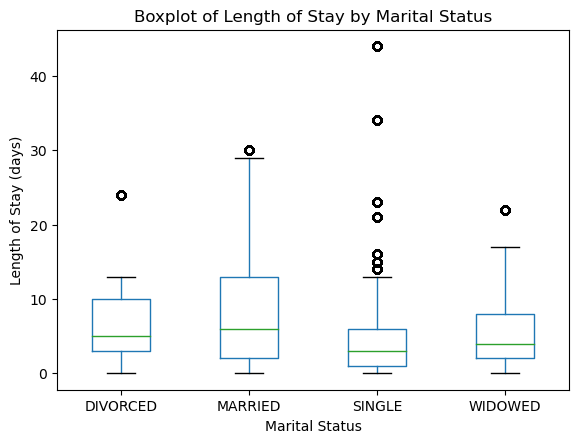

In [65]:
plt.figure(figsize=(12, 6))
cleaned_data.boxplot(column='length_of_stay', by='marital_status', grid=False)
plt.title('Boxplot of Length of Stay by Marital Status')
plt.suptitle('')  # Suppresses the automatic title to make the plot cleaner
plt.xlabel('Marital Status')
plt.ylabel('Length of Stay (days)')
plt.show()


Married individuals tend to have shorter hospital stays compared to divorced, single, and widowed individuals. Additionally, there are outliers in most groups, indicating some patients with exceptionally long hospital stays regardless of marital status. There is also greater variability in length of stay among divorced and widowed individuals.

---
---
## Modeling

First, we drop the columns we will not use for modeling.

In [66]:
model_df = cleaned_data.copy()
df_helper.drop_columns(
    model_df,[
        "subject_id",
        "hadm_id",
        "drug_type",
        "admittime",
        "dischtime",
])
#convert bmi column to numeric
model_df.bmi = model_df.bmi.astype(float)
#encode gender column to numeric


model_df

,drug,age,diagnosis,gender,admission_type,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died,length_of_stay
0,Fentanyl Citrate,71,"Urinary tract infection, site not specified",F,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
1,Fentanyl Citrate,71,Acute respiratory failure,F,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
2,Fentanyl Citrate,71,"Asthma, unspecified type, unspecified",F,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
3,Fentanyl Citrate,71,Solitary pulmonary nodule,F,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
4,Fentanyl Citrate,71,Streptococcus infection in conditions classifi...,F,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2362332,Carbamide Peroxide 6.5%,60,"Constipation, unspecified",M,OBSERVATION ADMIT,PHYSICIAN REFERRAL,Other,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362333,Carbamide Peroxide 6.5%,60,"Hematuria, unspecified",M,OBSERVATION ADMIT,PHYSICIAN REFERRAL,Other,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362334,Carbamide Peroxide 6.5%,60,Obstructive sleep apnea (adult) (pediatric),M,OBSERVATION ADMIT,PHYSICIAN REFERRAL,Other,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3
2362335,Carbamide Peroxide 6.5%,60,Long term (current) use of anticoagulants,M,OBSERVATION ADMIT,PHYSICIAN REFERRAL,Other,ENGLISH,SINGLE,WHITE,40.3,1.84,124.00,187.0,74.0,False,3


Then we check for correlations between the features.

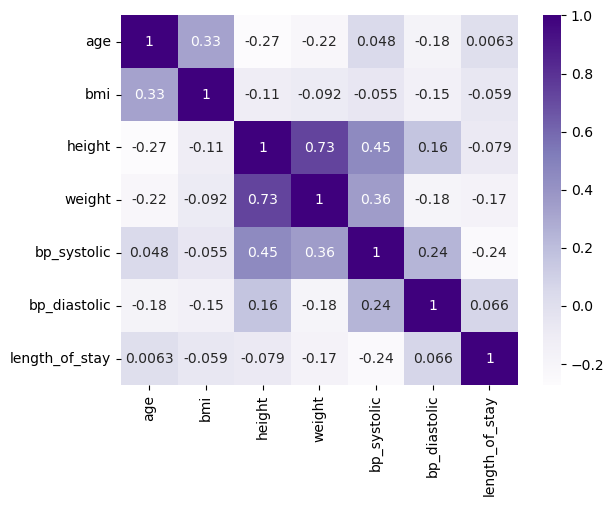

In [67]:
#get only numerical columns
numerical_columns = model_df.select_dtypes(include=np.number).columns
correlation_matrix = model_df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Purples");

**Observations:**
- Most features display little to moderate correlation with other features. This indicates that all features are independent of each other.
- The exception to this is height and weight, which have a relatively positive correlation to each other and gender.

### Length of stay

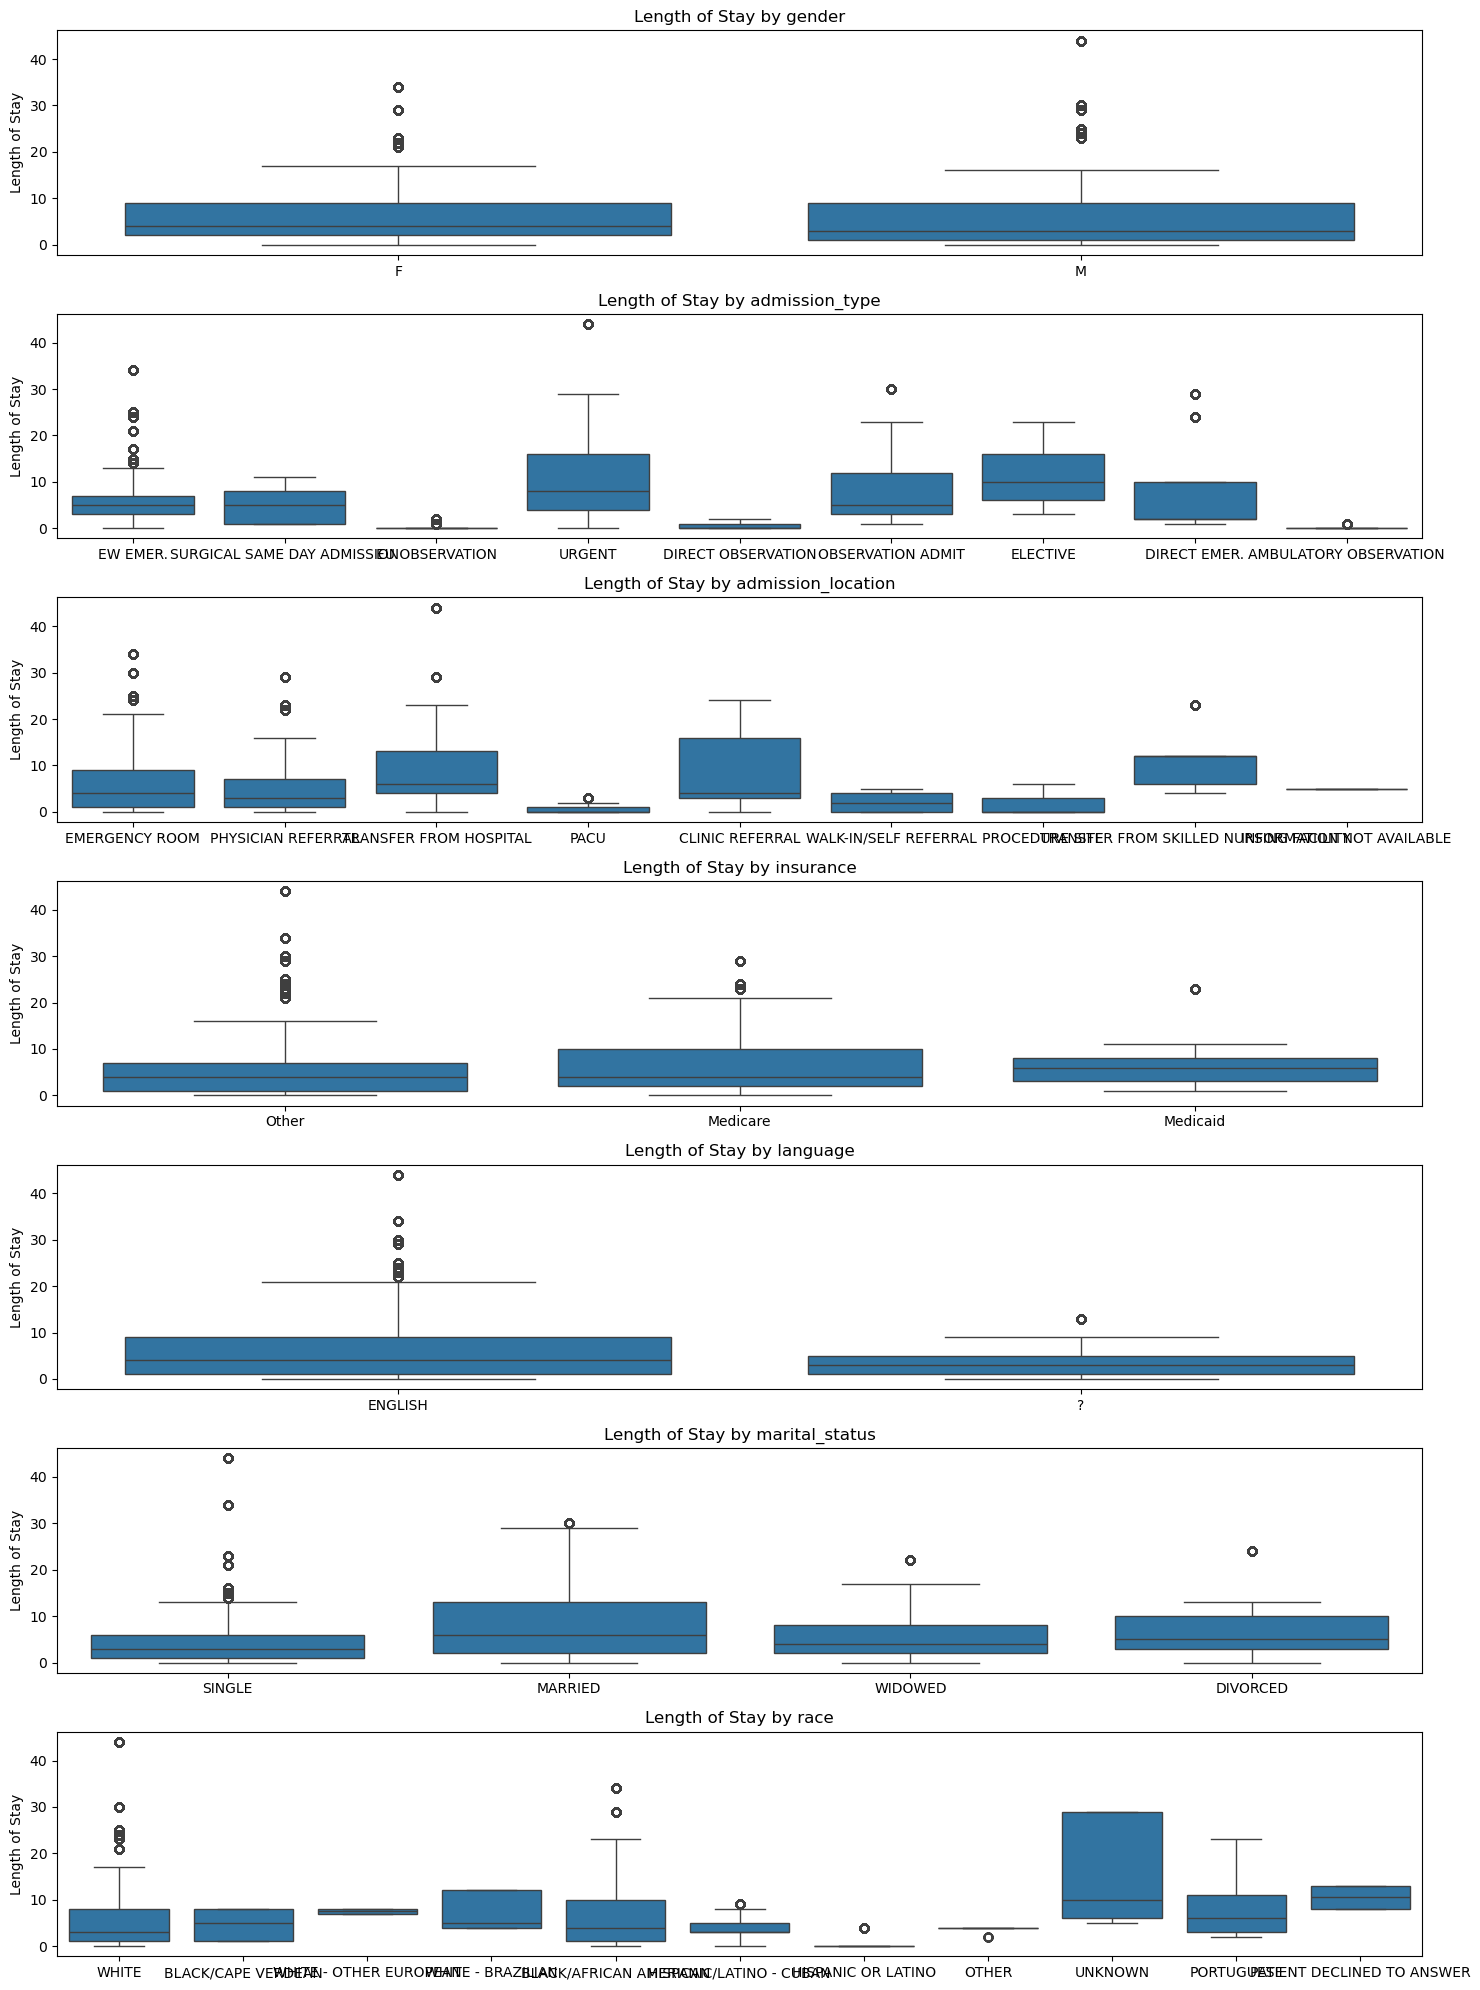

In [68]:
categorical_columns = df_helper.categorical_columns(
    df_helper.drop_columns_copy(
        model_df,
        ["drug", "diagnosis"]
    )
)
plt.figure(figsize=(15, 20))

# Iterate through each categorical column
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.boxplot(x=column, y='length_of_stay', data=model_df)
    plt.title(f'Length of Stay by {column}')
    plt.xlabel('')
    plt.ylabel('Length of Stay')

plt.tight_layout()
plt.show()


In [69]:
import scipy.stats as stats

# ANOVA for 'gender'
#f_stat, p_value = stats.f_oneway(
#    *[df[df['length_of_stay'] == cat]['length_of_stay'] for cat in df['gender'].unique()]
#)
#print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

KeyError: 'gender'

In [ ]:
model_df.head(1)

,drug,age,diagnosis,gender,admission_type,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,died,length_of_stay
0,Fentanyl Citrate,71,"Urinary tract infection, site not specified",F,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,False,21


In [ ]:
#import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score
from statsmodels.formula.api import ols



In [ ]:
categorical = ['drug', 'diagnosis', 'gender', 'admission_type', 'admission_location', 'insurance', 'language', 'marital_status', 'race']
continuous = list(model_df.select_dtypes(include=np.number).columns)
continuous.remove('length_of_stay')

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, continuous),
        ('cat', categorical_transformer, categorical)
    ],
)
continuous

['age', 'bmi', 'height', 'weight', 'bp_systolic', 'bp_diastolic']

In [ ]:
def model_evaluation(y_test, y_pred):
    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    median_ae = median_absolute_error(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)

    # Print metrics
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")
    print(f"Median Absolute Error: {median_ae:.2f}")
    print(f"Explained Variance Score: {explained_variance:.2f}")

In [ ]:
los_model_df = model_df.copy()
#we're only predicting how long a patient will stay, if they are dead or not makes no difference
df_helper.drop_columns(los_model_df, ['died'])
los_x, los_y = los_model_df.drop('length_of_stay', axis=1), los_model_df.length_of_stay
los_x_train, los_x_test, los_y_train, los_y_test = train_test_split(los_x, los_y, test_size=0.2, random_state=42)

**Linear Regression Model**

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Replace with your chosen regression model
])
model.fit(los_x_train, los_y_train)

# Predict on test set
y_pred = model.predict(los_x_test)
model_evaluation(los_y_test, y_pred)

Mean Absolute Error (MAE): 3.96
Mean Squared Error (MSE): 32.71
Root Mean Squared Error (RMSE): 5.72
R-squared (R²): 0.36
Median Absolute Error: 2.76
Explained Variance Score: 0.36


In [ ]:
#ols_df = preprocessor.fit_transform(los_model_df)

In [ ]:
los_model_df.head(1)

,drug,age,diagnosis,gender,admission_type,admission_location,insurance,language,marital_status,race,bmi,height,weight,bp_systolic,bp_diastolic,length_of_stay
0,Fentanyl Citrate,71,"Urinary tract infection, site not specified",F,EW EMER.,EMERGENCY ROOM,Other,ENGLISH,SINGLE,WHITE,27.7,1.59,69.17,128.0,80.0,21


In [ ]:
columns = continuous + ['C(drug)']
formula = 'length_of_stay ~ '+ ' + '.join(columns)
print(formula)
print()
ols_model = ols(formula, data=los_model_df).fit()
print(ols_model.summary())

length_of_stay ~ age + bmi + height + weight + bp_systolic + bp_diastolic + C(insurance) + C(language) + C(marital_status) + C(drug)



In [ ]:
ols_predicted = ols_model.predict(los_x_test)
model_evaluation(los_y_test, ols_predicted)

Mean Absolute Error (MAE): 4.15
Mean Squared Error (MSE): 36.28
Root Mean Squared Error (RMSE): 6.02
R-squared (R²): 0.29
Median Absolute Error: 3.11
Explained Variance Score: 0.29
